# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
app_train['AMT_INCOME_TOTAL'].quantile(0.75)

202500.0

In [6]:
income_data = app_train[['TARGET', 'AMT_INCOME_TOTAL']] 
#income_data = app_train[['TARGET', 'CNT_CHILDREN']]

In [7]:
income_data['income_BINNED'] = pd.cut(income_data['AMT_INCOME_TOTAL'], bins = np.linspace(0, 1000000, num = 11))

<ipython-input-7-86f42cc3ef3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data['income_BINNED'] = pd.cut(income_data['AMT_INCOME_TOTAL'], bins = np.linspace(0, 1000000, num = 11))


In [8]:
income_data.head()

,TARGET,AMT_INCOME_TOTAL,income_BINNED
0,1,202500.0,"(200000.0, 300000.0]"
1,0,270000.0,"(200000.0, 300000.0]"
2,0,67500.0,"(0.0, 100000.0]"
3,0,135000.0,"(100000.0, 200000.0]"
4,0,121500.0,"(100000.0, 200000.0]"


In [9]:
# 依照組別彙整年齡資料 "每一欄的平均值"
income_groups  = income_data.groupby('income_BINNED').mean()
income_groups

,TARGET,AMT_INCOME_TOTAL
income_BINNED,,
"(0.0, 100000.0]",0.082028,78074.093642
"(100000.0, 200000.0]",0.085479,142968.760787
"(200000.0, 300000.0]",0.075503,233694.505758
"(300000.0, 400000.0]",0.060303,337743.375963
"(400000.0, 500000.0]",0.060063,435551.920257
"(500000.0, 600000.0]",0.063014,547903.956164
"(600000.0, 700000.0]",0.048331,665191.263521
"(700000.0, 800000.0]",0.018519,740862.250000
"(800000.0, 900000.0]",0.057047,867831.780201


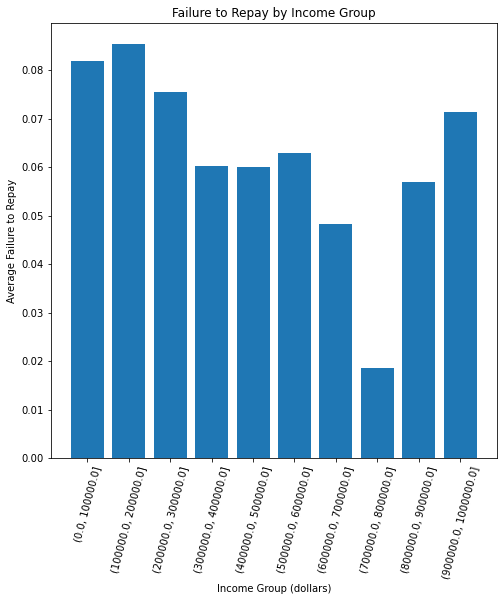

In [10]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(income_groups.index)), income_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(income_groups.index)), income_groups.index, rotation = 75); plt.xlabel('Income Group (dollars)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Income Group');

從年收入的角度切入，收入的高低跟能不能還出貸款沒有明顯趨勢關係